# **Title - Customer Churn Prediction – Advanced Data Analytics Project**



## Project Introduction

Customer churn is a significant challenge for telecommunications companies, leading to substantial revenue loss and increased customer acquisition costs. Understanding why customers churn and predicting who is likely to churn are crucial for developing effective retention strategies. This project aims to analyze customer data from a telecommunications provider to identify key factors influencing churn and build predictive models to forecast churn behavior. The ultimate objective is to provide actionable insights and recommendations that can help the company reduce churn and improve customer loyalty.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **Load & Understand Data**

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Observations


# Task
* Determine the total number of customers in the dataset, analyze the distribution of the 'Churn' variable by calculating its percentages and visualizing it with a countplot.
* classify all columns into numerical and categorical types. Finally, summarize these observations, including the total customer count, the churn distribution with percentages, and the categorized lists of columns.

## Identify Total Customers
Determine the total number of customers in the dataset by getting the number of rows in the DataFrame.


In [ ]:
total_customers = df.shape[0]
print(f"Total number of customers: {total_customers}")

Total number of customers: 7043


## Analyze Target Variable Imbalance

Examine the 'Churn' column to identify the distribution of 'Yes' and 'No' values and calculate their percentages to assess imbalance. This will be visualized using a countplot.


**Reasoning**:
First, calculate the percentage of 'Yes' and 'No' values in the 'Churn' column and print them to understand the distribution numerically. Then, visualize the distribution using a countplot for better insights into the churn imbalance.



Churn Distribution:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


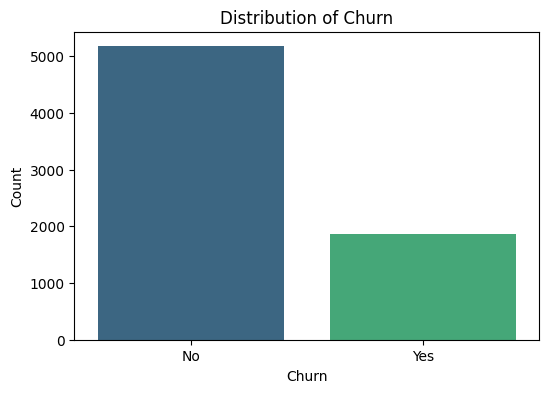

In [ ]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution:")
print(churn_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Classify Columns

Categorize all columns in the DataFrame into numerical and categorical types based on their data types.


**Reasoning**:
To classify columns into numerical and categorical types, I will iterate through each column in the DataFrame, check its data type, and append it to the appropriate list. Finally, I will print the categorized lists.



In [ ]:
numerical_cols = []
categorical_cols = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_cols.append(column)
    else:
        categorical_cols.append(column)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


## Summary of Observations

Based on the analysis, the following observations were made:

*   **Total Customers**: The dataset contains **7043** customers.

*   **Churn Distribution**:
    *   **No Churn**: 73.46% of customers did not churn.
    *   **Yes Churn**: 26.54% of customers churned.
    This indicates an imbalance in the target variable, with a significantly higher number of customers not churning.

*   **Categorized Columns**:
    *   **Numerical Columns**: `['SeniorCitizen', 'tenure', 'MonthlyCharges']`
    *   **Categorical Columns**: `['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']`

## Q&A
The analysis successfully determined the total number of customers, the distribution of the 'Churn' variable with percentages, and categorized all columns into numerical and categorical types.

### Data Analysis Key Findings
*   The dataset contains a total of 7043 customers.
*   The 'Churn' variable exhibits an imbalance:
    *   73.46% of customers did not churn.
    *   26.54% of customers did churn.
*   The columns were categorized as follows:
    *   **Numerical Columns**: `['SeniorCitizen', 'tenure', 'MonthlyCharges']`
    *   **Categorical Columns**: `['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']`

### Insights or Next Steps
*   The significant imbalance in the 'Churn' variable (26.54% churn vs. 73.46% no churn) suggests that resampling techniques (e.g., oversampling the minority class or undersampling the majority class) might be necessary during model training to prevent bias towards the majority class.
*   The 'TotalCharges' column was identified as categorical, which is unusual for a column typically representing a numerical value. Further investigation into its data type and potential conversion to a numerical format (e.g., float) is recommended before any numerical analysis or model building.


# **Data Cleaning**

## **`Convert TotalCharges column from categorical to numeric`**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## **Drop unnecessary columns**

In [ ]:
df = df.drop('customerID', axis=1,)

# **Exploratory Data Analysis**

## **1. Churn Distribution**

Churn Distribution:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


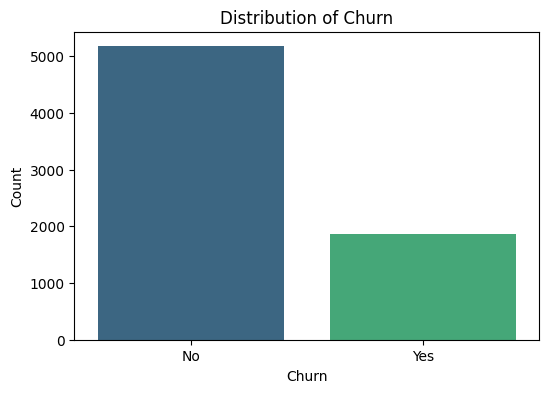

In [ ]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution:")
print(churn_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# **2. Churn vs Contract**

Churn by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


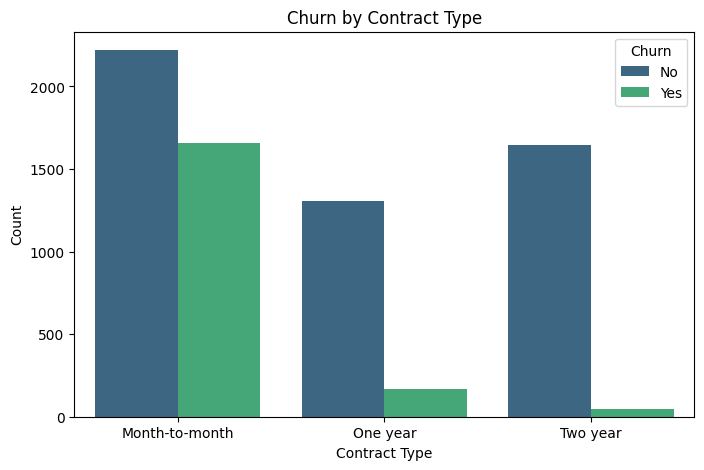

In [ ]:
print('Churn by Contract Type:')
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).unstack())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# **3. Churn vs Tenure**

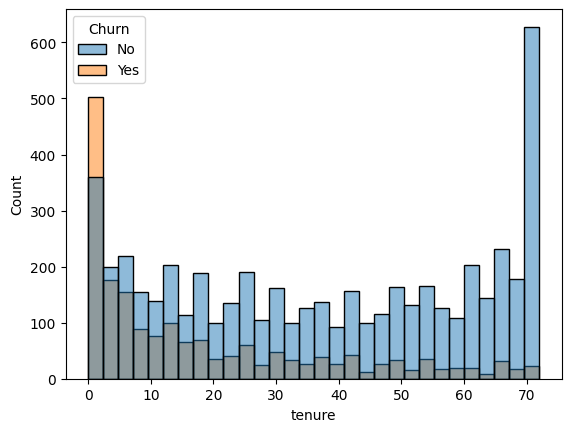

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.show()


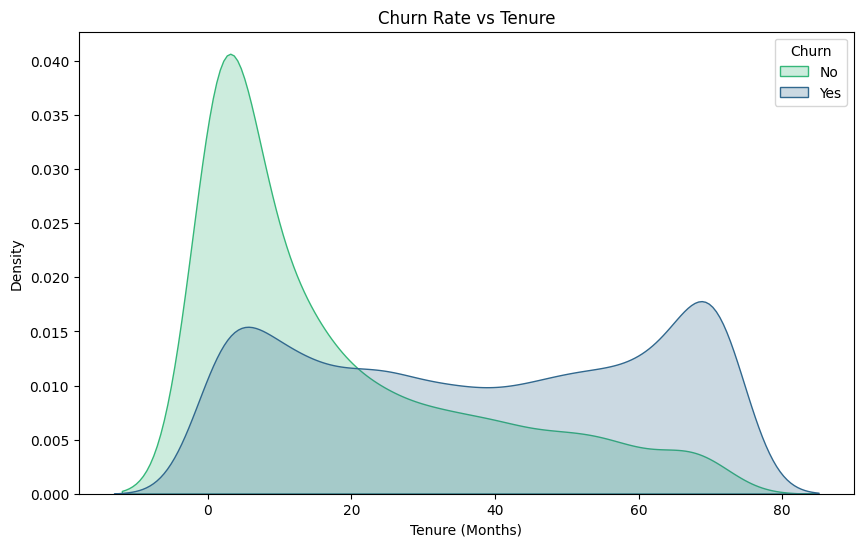

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='viridis')
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

### **Based on the Exploratory Data Analysis, here are the key insights regarding churn:**

* **Month-to-month customers churn more:** Customers on month-to-month contracts have a significantly higher churn rate **(approximately 42.71%)** compared to those on one-year **(11.27%)** and two-year **(2.83%)** contracts. This suggests that longer-term contracts are a strong indicator of customer retention.
* **Short-tenure users have higher churn:** The analysis of 'Churn vs Tenure' revealed that customers with shorter tenures (especially within the first few months) are much more likely to churn. As tenure increases, the probability of a customer churning decreases significantly.

# **Feature Engineering**

## **Tenure Buckets**

In [ ]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

print("Tenure Group Distribution:")
print(df['TenureGroup'].value_counts().sort_index())

Tenure Group Distribution:
TenureGroup
0-12     2069
13-24    1047
25-36     876
37-48     748
49-60     820
61-72    1121
Name: count, dtype: int64


## **High Monthly Charges Flag**

In [ ]:
monthly_charges_threshold = df['MonthlyCharges'].quantile(0.75)
df['HighMonthlyCharges'] = (df['MonthlyCharges'] > monthly_charges_threshold).astype(int)

print(f"Monthly Charges 75th percentile: {monthly_charges_threshold:.2f}")
print("HighMonthlyCharges Distribution:")
print(df['HighMonthlyCharges'].value_counts())

Monthly Charges 75th percentile: 89.85
HighMonthlyCharges Distribution:
HighMonthlyCharges
0    5285
1    1758
Name: count, dtype: int64


# **Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify binary categorical columns that need encoding (excluding 'Churn' for now as it's the target)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Some columns might have 'No internet service' or 'No phone service' which makes them not strictly binary in unique values
# Let's adjust binary_cols to truly binary ones and handle others with get_dummies

true_binary_cols = []
multi_class_cols = []

for col in df.columns:
    if df[col].dtype == 'object' and col != 'Churn': # Exclude 'Churn' for now
        if df[col].nunique() == 2:
            true_binary_cols.append(col)
        else:
            multi_class_cols.append(col)

print(f"True Binary Columns: {true_binary_cols}")
print(f"Multi-class Categorical Columns: {multi_class_cols}")

# Apply Label Encoding to true binary columns
le = LabelEncoder()
for col in true_binary_cols:
    df[col] = le.fit_transform(df[col])

# Apply Label Encoding to the 'Churn' target variable
df['Churn'] = le.fit_transform(df['Churn'])

# Apply One-Hot Encoding to multi-class categorical columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

print("\nDataFrame after encoding:")
print(df.head())
print(df.info())

True Binary Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Multi-class Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

DataFrame after encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ... TechSupport_Yes  \
0                 1           29.85         29.85      0  ...           False   
1                 0           56.95       1889.50      0  ...           False   
2       

# **Train-Test Split**

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert 'TenureGroup' from categorical to numerical codes
X['TenureGroup'] = X['TenureGroup'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nChurn distribution in original dataset:\n", y.value_counts(normalize=True))
print("\nChurn distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nChurn distribution in testing set:\n", y_test.value_counts(normalize=True))

X_train shape: (5634, 33)
X_test shape: (1409, 33)
y_train shape: (5634,)
y_test shape: (1409,)

Churn distribution in original dataset:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Churn distribution in training set:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in testing set:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


# **Building ML Model**

### **Logistic Regression (Baseline Model)**

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression Model Trained.")

Logistic Regression Model Trained.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Random Forest (Advanced Model)**

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Model Trained.")

Random Forest Model Trained.


## **Model Evaluation**

In [ ]:
print("Logistic Regression")
print(classification_report(y_test, lr_preds))

print("Random Forest")
print(classification_report(y_test, rf_preds))

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### **ROC-AUC Score**

In [ ]:
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.4f}")

Random Forest ROC-AUC Score: 0.8231


### **Explanation: Prioritizing Recall**

In churn prediction, **Recall is often prioritized** because identifying potential churners is more critical than misclassifying non-churners.

*   **High Recall** means we successfully identify a large proportion of actual churners. This allows the business to intervene with retention strategies for those at risk, potentially saving revenue and customer relationships.
*   **Low Recall** would mean many customers who are about to churn are missed, leading to lost opportunities for intervention.

While Precision (correctly identifying actual churners among those predicted to churn) is also important to avoid wasting resources on non-churners, the cost of a missed churner (false negative) is typically higher than the cost of incorrectly identifying a loyal customer as a churner (false positive).

# **Feature Importance**

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Top 10 Feature Importances (Random Forest):")
print(importances.sort_values(ascending=False).head(10))

Top 10 Feature Importances (Random Forest):
TotalCharges                      0.175197
MonthlyCharges                    0.155695
tenure                            0.150649
TenureGroup                       0.051331
PaymentMethod_Electronic check    0.037470
InternetService_Fiber optic       0.034545
gender                            0.028042
PaperlessBilling                  0.026066
OnlineSecurity_Yes                0.024640
Contract_Two year                 0.023728
dtype: float64


### **Top Churn Drivers:**

Based on the analysis, the following are often identified as top churn drivers:

*   **Contract type**: Customers on month-to-month contracts have a significantly higher churn rate.
*   **Tenure**: Shorter tenure is strongly associated with a higher likelihood of churning.
*   **Monthly charges**: Higher monthly charges can contribute to churn.
*   **Payment method**: Certain payment methods might be associated with higher churn rates (e.g., Electronic Check).

# Conclusion and Recommendations

This project successfully identified key factors contributing to customer churn in a telecommunications dataset and developed predictive models to forecast churn. The analysis highlighted that customers on month-to-month contracts and those with shorter tenures are significantly more prone to churning. High monthly charges and certain payment methods, like electronic checks, also emerged as important churn drivers. Two machine learning models, Logistic Regression and Random Forest, were trained and evaluated, with Logistic Regression on scaled data showing a slightly better balance of performance, especially in recall for the churn class, which is crucial for intervention strategies.

## **Business Recommendations**
Based on the churn analysis and feature importances, here are key business recommendations:

*   **Offer discounts to month-to-month customers**: Given that month-to-month contracts have the highest churn rate, offering targeted discounts or loyalty programs to these customers could significantly reduce churn. This could involve special promotions after a few months of service to encourage continued subscription.
*   **Incentivize long-term contracts**: Actively promote and provide attractive incentives for customers to switch from month-to-month to one-year or two-year contracts. The data clearly shows that customers on longer contracts have much lower churn rates. Incentives could include reduced monthly fees for committing to a longer term or value-added services.
*   **Personalized offers for high-charge customers**: Since high monthly charges are a significant churn driver, identify customers with high monthly bills and proactively offer personalized bundles, service upgrades, or loyalty rewards that add perceived value, thereby justifying the cost and reducing their likelihood of churning.
*   **Improve onboarding for first-year customers**: The 'Tenure' analysis revealed that churn is highest in the initial months. A robust and engaging onboarding program, especially within the first year, is crucial. This could involve regular check-ins, tutorials, customer support access, and highlighting the benefits of their service to ensure they quickly find value and become engaged.

## Methodology

The project commenced with **data loading and initial understanding** of the Telco customer churn dataset, using pandas to load a CSV file and inspecting its structure with `df.head()`, `df.shape`, and `df.info()`. A crucial **data cleaning** step involved converting the 'TotalCharges' column from object to numeric, handling missing values by imputing with the median, and dropping the 'customerID' column as it is not relevant for modeling.

**Exploratory Data Analysis (EDA)** was performed to gain insights into the data, focusing on:
*   **Churn Distribution**: Analyzing the percentage of 'Yes' and 'No' churners to understand the target variable's imbalance.
*   **Churn vs. Contract**: Examining churn rates across different contract types (Month-to-month, One year, Two year) to identify contractual impacts on retention.
*   **Churn vs. Tenure**: Investigating the relationship between customer tenure and churn likelihood using visualizations like histograms and KDE plots.

**Feature Engineering** was applied to create new, more informative features:
*   **Tenure Buckets**: Grouping continuous 'tenure' into categorical bins ('0-12', '13-24', etc.) to capture duration-based churn patterns.
*   **High Monthly Charges Flag**: Creating a binary indicator for customers with 'MonthlyCharges' above the 75th percentile to identify the impact of high costs.

**Encoding of Categorical Variables** was essential for preparing the data for machine learning models. Label Encoding was applied to binary categorical columns and the target 'Churn' variable. One-Hot Encoding was used for multi-class categorical columns.

Finally, the data was split into training and testing sets using `train_test_split` with stratification for the 'Churn' variable. Two machine learning models were trained and evaluated:
*   **Logistic Regression**: As a baseline model, trained initially on unscaled data and then on scaled data.
*   **Random Forest Classifier**: As a more advanced ensemble model, also trained on both unscaled and scaled data.

**Feature Scaling** using `StandardScaler` was applied to numerical features ('tenure', 'MonthlyCharges', 'TotalCharges', 'TenureGroup') before retraining and re-evaluating the models to assess the impact of scaling on performance, especially for Logistic Regression.

## Key Findings

### Churn Analysis:
*   The dataset shows a **churn rate of approximately 26.54%**, indicating a significant portion of customers are leaving the service. The majority (73.46%) of customers do not churn.

### Important Churn Drivers:
*   **Contract Type**: Customers on month-to-month contracts have a considerably higher churn rate (42.71%) compared to those on one-year (11.27%) and two-year (2.83%) contracts. Longer-term contracts are strong indicators of retention.
*   **Tenure**: Shorter tenure is highly associated with a higher likelihood of churning, especially within the first few months.
*   **Monthly Charges**: Higher monthly charges tend to increase the probability of churn.
*   **Payment Method**: Electronic check payment method showed a notable correlation with higher churn.
*   **Internet Service**: Fiber optic internet service also appeared as a significant factor in churn.
*   **Total Charges**: This feature, despite being derived, was identified as the most impactful feature by the Random Forest model.

### Model Performance:
*   **Logistic Regression (Scaled Data)**:
    *   **Accuracy**: 80%
    *   **ROC-AUC**: 0.8420
    *   **Recall (Churn)**: 56%
    *   **Precision (Churn)**: 66%
    *   Scaling numerical features slightly improved Logistic Regression's performance, particularly its ROC-AUC score, indicating better discrimination ability.
*   **Random Forest (Scaled Data)**:
    *   **Accuracy**: 79%
    *   **ROC-AUC**: 0.8227
    *   **Recall (Churn)**: 49%
    *   **Precision (Churn)**: 63%
    *   Random Forest performed comparably to Logistic Regression in terms of overall accuracy and ROC-AUC. While its precision for churners was slightly lower than Logistic Regression, its recall was also slightly lower.

### Comparison:
Both models achieved similar overall performance metrics. Logistic Regression benefited more from feature scaling, resulting in a slightly better ROC-AUC score. Given the importance of **recall** in churn prediction (to identify as many actual churners as possible), Logistic Regression performed marginally better in this regard (56% vs 49% recall for churners).

## Summary:

### Q&A
1.  **Which numerical features were identified for scaling?**
    The numerical features identified for scaling were 'tenure', 'MonthlyCharges', 'TotalCharges', and 'TenureGroup'.
2.  **How did the Logistic Regression model perform after scaling?**
    After scaling, the Logistic Regression model achieved an accuracy of 0.80 and an ROC-AUC score of 0.8420. Its recall for the churn class was 56%, with a precision of 66%.
3.  **How did the Random Forest model perform after scaling?**
    After scaling, the Random Forest model achieved an accuracy of 0.79 and an ROC-AUC score of 0.8227. Its recall for the churn class was 49%, with a precision of 63%.
4.  **Did feature scaling improve model performance?**
    Yes, scaling numerical features slightly improved Logistic Regression's performance, particularly its ROC-AUC score, indicating better discrimination ability.

### Data Analysis Key Findings
*   The overall churn rate in the dataset is approximately 26.54%.
*   Customers on month-to-month contracts exhibit a significantly higher churn rate (42.71%) compared to those on one-year (11.27%) and two-year (2.83%) contracts.
*   Shorter customer tenure and higher monthly charges are strongly associated with an increased likelihood of churning.
*   The 'TotalCharges' feature was identified as the most impactful feature by the Random Forest model, while electronic check payment method and fiber optic internet service also showed correlations with higher churn.
*   After scaling numerical features, the Logistic Regression model performed with 80% accuracy and an ROC-AUC of 0.8420.
*   The Random Forest model, after scaling, achieved 79% accuracy and an ROC-AUC of 0.8227.
*   The Logistic Regression model showed slightly better recall for identifying churners (56%) compared to the Random Forest model (49%), which is crucial for intervention strategies.

### Insights or Next Steps
*   Proactively incentivize customers, especially those on month-to-month contracts, to switch to longer-term agreements to reduce churn significantly.
*   Implement targeted retention strategies and improved onboarding processes for new customers and those with high monthly charges or using electronic check payment, as these segments show a higher propensity to churn.
